# MNIST
MNIST is a simple computer vision dataset. It consists of images of handwritten digits.
The MNIST data is hosted on http://yann.lecun.com/exdb/mnist/

The data is split into three parts, 55,000 data points of training data (mnist.train), 10,000 points of test data (mnist.test), and 5,000 points of validation data (mnist.validation)

The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. For simplicity, each image has been flatten and converted to a 1-D numpy array of 784 features (28*28).

<img src="images/mnist_sample_images.png" alt="MNIST_Sample_Image" style="width: 300px;"/>

## Load MNIST Data Using TensorFlow Datasets

We can use tensorflow_datasets to use that MNIST dataset

#### Extract - Transform - Load (ETL)
- To perform the Extract process we use tfts.load. This handles everything from downloading the raw data to parsing and splitting it, giving us a dataset. 
- Transform process: In this example, we will just shuffle the dataset. 
- In this case, each record consists of an image and its corresponding label. We will load one record to plot the image and print its corresponding label.

In [1]:
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

print("\u2022 TensorFlow version :", tf.__version__)

• TensorFlow version : 2.3.0


Label: 2


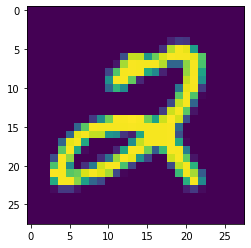

In [10]:
# EXTRACT
dataset = tfds.load(name="mnist", split="test")

# TRANSFORM
dataset.shuffle(100)

# LOAD
for data in dataset.take(1):
    image = data["image"].numpy().squeeze()
    label = data["label"].numpy()
    
    print("Label: {}".format(label))
    plt.imshow(image) # plt.imshow(image, cmap=plt.cm.binary)
    plt.show()

Label: 4


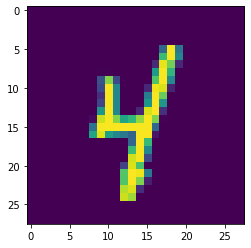

In [15]:
# EXTRACT
dataset = tfds.load(name="mnist", split="train")

# TRANSFORM
dataset.shuffle(100)

# LOAD
for data in dataset.take(1):
    image = data["image"].numpy().squeeze()
    label = data["label"].numpy()
    
    print("Label: {}".format(label))
    plt.imshow(image) # plt.imshow(image, cmap=plt.cm.binary)
    plt.show()

In [14]:
dataset = tfds.load(name="mnist")
dataset

{'test': <PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>,
 'train': <PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>}

In [18]:
# See available datasets

tfds.list_builders()

['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'amazon_us_reviews',
 'arc',
 'bair_robot_pushing_small',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'cos_e',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'duke_ultrasound',
 'emnist',
 'eraser_multi_rc',
 'esnli',
 'eurosat',
 'fashion_mnist',
 'flic',
 'flores',
 'food101',
 'forest_fires',
 'gap',
 'ge

In [25]:
# Load dataset with info

dataset, info = tfds.load(name="mnist", with_info=True)
print(info)
print(info.homepage)
print(info.splits)

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

http://yann.lecun.com/exdb/mnist/
{'test': <tfds.core.SplitInfo num_examples=10000>, 'train': <tfds.core.SplitInfo num_examples=60000>}


In [30]:
# to load specific version
dataset = tfds.load(name="mnist:3.*.*")

In [42]:
# loading as supervised
dataset = tfds.load("mnist", as_supervised=True)
dataset
dataset['train']
print(len(list(dataset)))

2


### Splits, Slicing
https://www.tensorflow.org/datasets/splits

In [41]:
dataset = tfds.load("mnist", split=tfds.Split.TEST)
print(dataset)
print(len(list(dataset)))

<PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>
10000


In [50]:
all = [tfds.Split.TRAIN , tfds.Split.TEST]
dataset = tfds.load("mnist", split = all)
print(len(list(dataset)))

2


In [56]:
# The full `train` split.
train_ds = tfds.load('mnist', split='train')

# The full `train` split and the full `test` split as two distinct datasets.
train_ds, test_ds = tfds.load('mnist', split=['train', 'test'])

# The full `train` and `test` splits, interleaved together.
train_test_ds = tfds.load('mnist', split='train+test')

In [54]:
# From record 10 (included) to record 20 (excluded) of `train` split.
train_10_20_ds = tfds.load('mnist', split='train[10:20]')
print(len(list(train_10_20_ds)))

10


In [55]:
# from 49% to 50%
train_49_50_ds = tfds.load("mnist", split="test[49%:50%]")
print(len(list(train_49_50_ds)))

100
